# Classify handwritten alphanumeric characters using deep learning
This work is part of a collection of practice sets called [Deep Learning Starters](https://github.com/jamiemorales/project-deep-learning-starters).
It aims to help someone get started fast and gain a high-level understanding of the fundamental steps in the deep learning lifecycle early on.
After completion, someone will have built intuition over the deep learning lifecycle. 

## Step 0 Understand the problem
What we're trying to do here is classify handwriten characters.

## Step 1: Set-up and understand data
In this step, we layout the tools we will need to solve the problem identified in the previous step. We want to inspect our data sources and explore the data itself to gain an understanding of the data for preprocessing and modeling.

In [82]:
# Set-up libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [84]:
# Load data
train_images = pd.read_csv('../input/emnist/emnist-balanced-train.csv')
test_images = pd.read_csv('../input/emnist/emnist-balanced-train.csv')

train_labels = np.array(train_images.iloc[:, 0].values)
train_images = np.array(train_images.iloc[:, 1:].values)

test_labels = np.array(test_images.iloc[:, 0].values)
test_images = np.array(test_images.iloc[:, 1:].values)

In [85]:
# Explore data
print('Shape of training data:', train_images.shape)
print('Shape of training labels:', train_labels.shape)

print('Shape of test data:', test_images.shape)
print('Shape of test labels:', test_labels.shape)

Shape of training data: (112799, 784)
Shape of training labels: (112799,)
Shape of test data: (112799, 784)
Shape of test labels: (112799,)


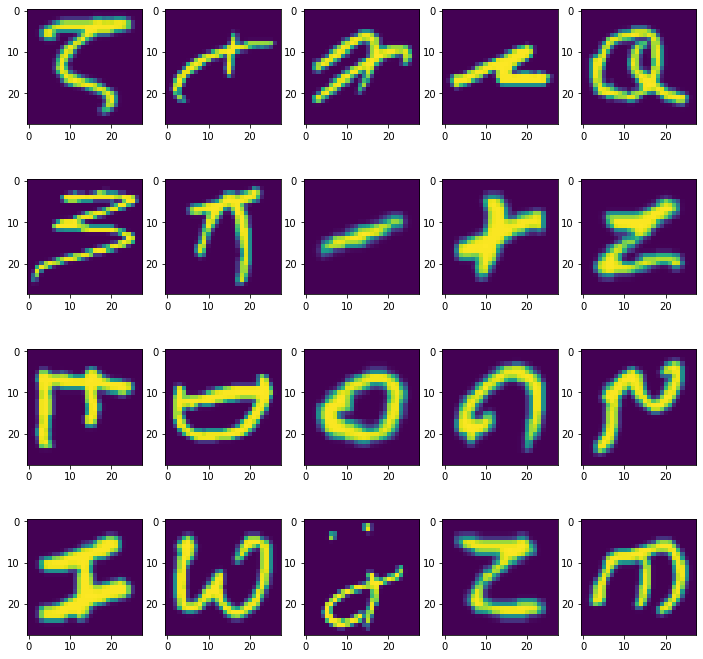

In [86]:
# Explore a few items
plt.figure(figsize=(12,12))
for i in range(1,21):
    plt.subplot(4,5,i)
    plt.imshow(train_images[i].reshape(28,28))

## Step 2: Prepare data and understand some more
In this step, we perform the necessary transformations on the data so that the neural network would be able to understand it. Real-world datasets are complex and messy. For our purposes, most of the datasets we work on in this series require minimal preparation.

In [87]:
# Normalise and reshape data
train_images_number = train_images.shape[0]
train_images_height = 28
train_images_width = 28
train_images_size = train_images_height*train_images_width

train_images = train_images / 255.0
train_images = train_images.reshape(train_images_number, train_images_height, train_images_width, 1)

test_images_number = test_images.shape[0]
test_images_height = 28
test_images_width = 28
test_images_size = test_images_height*test_images_width

test_images = test_images / 255.0
test_images = train_images.reshape(test_images_number, test_images_height, test_images_width, 1)

In [88]:
# Transform labels
number_of_classes = 47

train_labels = tf.keras.utils.to_categorical(train_labels, number_of_classes)
test_labels = tf.keras.utils.to_categorical(test_labels, number_of_classes)

In [89]:
# Explore data some more
print('Shape of training: ', train_images.shape)
print('Shape of training labels: ', train_images.shape)

print('Number of images: ', train_images_number)
print('Height of image: ', train_images_height)
print('Width of image: ', train_images_width)
print('Size of image: ', train_images_size)

print('\nShape of test: ', test_images.shape)
print('Shape of training labels: ', train_images.shape)

print('Number of images: ', test_images_number)
print('Height of image: ', test_images_height)
print('Width of image: ', test_images_width)
print('Size of image: ', test_images_size)

Shape of training:  (112799, 28, 28, 1)
Shape of training labels:  (112799, 28, 28, 1)
Number of images:  112799
Height of image:  28
Width of image:  28
Size of image:  784

Shape of test:  (112799, 28, 28, 1)
Shape of training labels:  (112799, 28, 28, 1)
Number of images:  112799
Height of image:  28
Width of image:  28
Size of image:  784


## Step 3: Build, train, and evaluate neural network
First, we design the neural network, e.g., sequence of layers and activation functions. 

Second, we train the neural network, we iteratively make a guess, calculate how accurate that guess is, and enhance our guess. The first guess is initialised with random values. The goodness or badness of the guess is measured with the loss function. The next guess is generated and enhanced by the optimizer function.

Lastly, use the neural network on previously unseen data and evaluate the results.

In [90]:
# Build and train neural network
model = tf.keras.Sequential([tf.keras.layers.Flatten(input_shape=(28,28,1)),
                            tf.keras.layers.Dense(128, activation='relu'),
                            tf.keras.layers.Dense(64, activation='relu'),
                            tf.keras.layers.Dense(number_of_classes, activation='softmax')
                            ])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy']
             )

model.fit(train_images, train_labels, epochs=15)

Train on 112799 samples
Epoch 1/15
112799/112799 [==============================] - 9s 79us/sample - loss: 1.0120 - accuracy: 0.7007
Epoch 2/15
112799/112799 [==============================] - 8s 75us/sample - loss: 0.6277 - accuracy: 0.7967
Epoch 3/15
112799/112799 [==============================] - 8s 74us/sample - loss: 0.5465 - accuracy: 0.8183
Epoch 4/15
112799/112799 [==============================] - 8s 74us/sample - loss: 0.4988 - accuracy: 0.8313
Epoch 5/15
112799/112799 [==============================] - 8s 74us/sample - loss: 0.4663 - accuracy: 0.8393
Epoch 6/15
112799/112799 [==============================] - 9s 76us/sample - loss: 0.4417 - accuracy: 0.8463
Epoch 7/15
112799/112799 [==============================] - 9s 76us/sample - loss: 0.4222 - accuracy: 0.8520
Epoch 8/15
112799/112799 [==============================] - 8s 74us/sample - loss: 0.4075 - accuracy: 0.8560
Epoch 9/15
112799/112799 [==============================] - 8s 74us/sample - loss: 0.3951 - accuracy: 0.

In [91]:
# Apply the neural network
test_loss, test_accuracy = model.evaluate(test_images, test_labels)

print('Test loss: {}, Test accuracy: {}'.format(test_loss, test_accuracy*100))

112799/112799 [==============================] - 5s 48us/sample - loss: 0.2976 - accuracy: 0.8869
Test loss: 0.2976101198918035, Test accuracy: 88.69404792785645


## More

If you found this work interesting, you might like:

* Machine Learning Starters

* Deep Learning Starters

* Natural Language Processing Starters

You can find more at [github.com/jamiemorales](https://github.com/jamiemorales).

Datasets are not mine. List of sources: [Datasets and sources](https://github.com/jamiemorales/project-deep-learning-starters/blob/master/00-Datasets/Data%20sources.txt)

For sharing this work, here's how / the license: https://creativecommons.org/licenses/by-sa/4.0/